# Task 3 : Iris Flower Classification

In [5]:
import pandas as pd
import numpy as np

In [10]:
Data= pd.read_csv("/content/drive/MyDrive/Arshiya/IRIS.csv")
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
Data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [12]:
# we do not have any null values in our data set for processing
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
Data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# let's visualize our Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: xlabel='species', ylabel='count'>

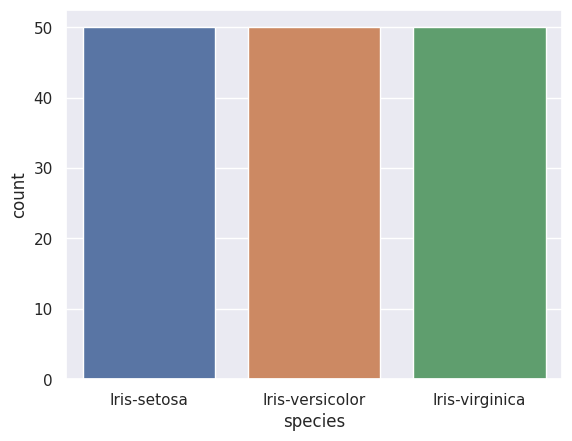

In [17]:
sns.countplot(x = 'species', data = Data,)

<Axes: xlabel='species', ylabel='petal_length'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


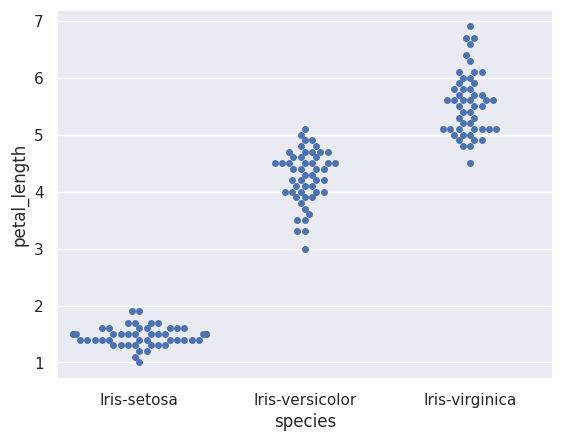

In [18]:
sns.swarmplot(x= 'species', y='petal_length', data = Data)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

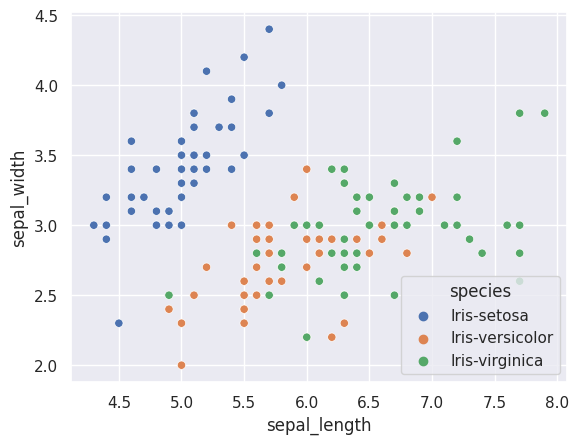

In [19]:
sns.scatterplot(x ='sepal_length', y = 'sepal_width', hue ='species', data = Data)

# Model our training and develop it

In [20]:
Data.replace({'species':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace = True)

In [21]:
# splitting the dataset into training data and testing data
from sklearn.model_selection import train_test_split

In [22]:
# Let's split the feature and target variable
x = Data.drop(columns='species', axis= 1 )
y = Data['species']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=4)

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [26]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = LR.predict(x_test)
acc_LR = accuracy_score(y_pred, y_test)
print(acc_LR)

0.9736842105263158


In [30]:
from sklearn import metrics
score = round(LR.score(x_test, y_test)*100,2)
print('accuracy score for the logistic regression model is:', score)

accuracy score for the logistic regression model is: 97.37


In [31]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model is:', cls_report)

classification report for our model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.96        38
weighted avg       0.98      0.97      0.97        38



In [35]:
# predicting values from the dataset
Data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
LR.predict([[5.0, 3.6, 1.4, 0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

##it predicted our data correctly :)

# Thank You